<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.1  Importing librarries and packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.2 Importing the data set.
Source: https://statistics.knbs.or.ke/nada/index.php/catalog/124/get-microdata

In [3]:
pip install openpyxl



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
Df=pd.read_excel(r"C:\Users\user pc\Desktop\DTE Datathon\Updated datasset.xlsx")

###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">The orginal dataset had a lot of datapoints, most of which were not useful. The quickest and simplest approach was to simply pick the data columns required and fit them into a new excel sheet. The new excel sheet "Updated dataset" is a subset of the original dataset, "Urban-population-households-density-by-county.xlsx".   The original dataset is referenced above and will be added to the final document submission.

In [5]:
print(Df)

            County Category                                  Education metrics
0      Trans Nzoia    Rural  Completed technical training after secondary s...
1            Busia    Rural  Completed technical training after secondary s...
2         Machakos    Rural                                    "Some primary "
3           Kisumu    Rural                                "Primary completed"
4            Nyeri    Urban                                "Primary completed"
...            ...      ...                                                ...
22019       Nakuru    Rural                             "Secondary completed "
22020        Bomet    Rural                                "Primary completed"
22021      Makueni    Rural                             "Secondary completed "
22022        Bomet    Rural                                   "Some secondary"
22023      Mandera    Rural                                    "Some primary "

[22024 rows x 3 columns]


In [6]:
## checking for and dropping any missing values

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(Df)

,Total,Percent
County,0,0.0
Category,0,0.0
Education metrics,0,0.0


In [7]:
## checking for all the categoristaions under Education metrics.

# Getting the  unique categories
unique_categories = Df['Education metrics'].unique()
print(unique_categories)

['Completed technical training after secondary school' '"Some primary "'
 '"Primary completed"' '"Secondary completed "' '"None "'
 'Some technical training after secondary school' '"Some secondary"'
 'Some university' '"University completed "' '"Other (Specify) "'
 '"Don\'t know (DO NOT READ OUT)"' '"Refused to Answer (DO NOT READ OUT)"']


In [8]:
## To determine the number of literate and illetrate persons based on the premise that a literate person has successfully completed secondary education

# Values to exclude from 'Education Metrics'
exclude_values = ['"Refused to Answer (DO NOT READ OUT)"', '"Don\'t know (DO NOT READ OUT)"', '"Other (Specify) "' , '"Some secondary"' , '"Some primary "']

# Condition to filter out rows with the specified values in 'Education Metrics'
condition = ~Df['Education metrics'].isin(exclude_values)

# Filter the DataFrame to select 'rural' entries that meet the condition
rural_filtered = Df[(Df['Category'] == 'Rural') & condition]

# Count the number of 'rural' entries that meet the condition
count_rural_entries_literate = rural_filtered.shape[0]

# Filter the DataFrame to select 'urban' entries that meet the condition

urban_filtered = Df[(Df['Category'] == 'Urban') & condition]

# Count the number of 'urban' entries that meet the condition

count_urban_entries_literate = urban_filtered.shape[0]






#### To determine literacy rates accross rural and urban areas, we use the above dataset as a sample. As per monte carlo simulation measures, the result obtained should be very close to the actual value. By counting the total counts of educated persons in the dataset who live in rural or urban areas we can compute a percentage for literacy rates.

In [9]:
print(count_rural_entries_literate)

print(count_urban_entries_literate)


9032
5611


In [10]:
## To determine the rural population.

count_rural_entries = Df["Category"].value_counts().get('Rural', 0)
print(count_rural_entries)

14455


In [11]:
### Determining the urban population

count_urban_entries = Df["Category"].value_counts().get('Urban', 0)
print(count_urban_entries)


7569


###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">  Now we can compute what percent of the rural population and urban population are literate


In [12]:
literacy_rate_urban= (count_urban_entries_literate/count_urban_entries)* 100
percentage_literacy_rate_urban = f"{literacy_rate_urban:.2f}%"  # correct to 2 dp
literacy_rate_rural= (count_rural_entries_literate/count_rural_entries)*100
percentage_literacy_rate_rural = f"{literacy_rate_rural:.2f}%"  # correct to 2 dp

print("The literacy rate in rural areas is " + str(percentage_literacy_rate_rural))
print("The literacy rate in urban areas is " + str(percentage_literacy_rate_urban))

The literacy rate in rural areas is 62.48%
The literacy rate in urban areas is 74.13%


In [13]:
# Defining the specific values to drop. Some observations made during data collection have no direct or inferred relevance to our exploration.
value_drop = ['"Refused to Answer (DO NOT READ OUT)"', '"Don\'t know (DO NOT READ OUT)"', '"Other (Specify) "' , '"Some secondary"' , '"Some primary "']

# we drop "some secondary" because to be considered literate in the most basic form, you need to have successfully completed secondary education but not necessarily enrolled into tertiary education.

# Create a boolean mask to identify rows with values to drop
mask = Df['Education metrics'].isin(value_drop)

# Use the mask to drop rows with the specified values
Df = Df[~mask]


In [14]:
print(Df)

            County Category                                  Education metrics
0      Trans Nzoia    Rural  Completed technical training after secondary s...
1            Busia    Rural  Completed technical training after secondary s...
3           Kisumu    Rural                                "Primary completed"
4            Nyeri    Urban                                "Primary completed"
5         Murang'a    Urban                             "Secondary completed "
...            ...      ...                                                ...
22016      Mombasa    Urban                            "University completed "
22018  Uasin Gishu    Urban                            "University completed "
22019       Nakuru    Rural                             "Secondary completed "
22020        Bomet    Rural                                "Primary completed"
22021      Makueni    Rural                             "Secondary completed "

[14643 rows x 3 columns]


In [15]:
Df.describe()

,County,Category,Education metrics
count,14643,14643,14643
unique,47,2,7
top,Nakuru,Rural,"""Primary completed"""
freq,549,9032,4207


In [16]:
### allocating categorical variables some numerical identifiers, 0 for rural and 1 for urban

# applyiing a category mapping.

# Define a mapping from categories to 1 and 0
category_mapping = {'Rural': 0, 'Urban': 1}

# Create a new column based on the mapping
Df['Urban vs Rural'] = Df['Category'].map(category_mapping)

In [38]:
print(Df)

            County Category  \
0      Trans Nzoia    Rural   
1            Busia    Rural   
3           Kisumu    Rural   
4            Nyeri    Urban   
5         Murang'a    Urban   
...            ...      ...   
22016      Mombasa    Urban   
22018  Uasin Gishu    Urban   
22019       Nakuru    Rural   
22020        Bomet    Rural   
22021      Makueni    Rural   

                                       Education metrics  Urban vs Rural  
0      Completed technical training after secondary s...               0  
1      Completed technical training after secondary s...               0  
3                                    "Primary completed"               0  
4                                    "Primary completed"               1  
5                                 "Secondary completed "               1  
...                                                  ...             ...  
22016                            "University completed "               1  
22018                      

###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Pie chart to show the difference in literacy rates in urban and rural areas.


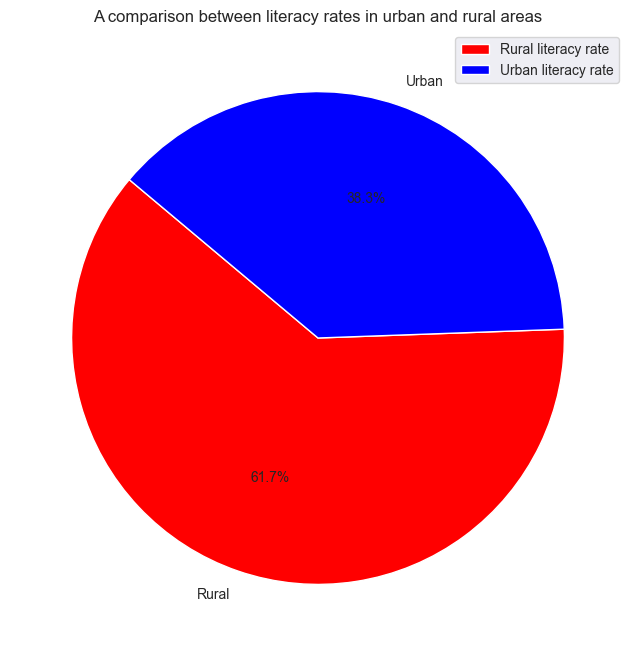

In [17]:
#fitting the figures on literacy in an array
sizes=[count_rural_entries_literate,count_urban_entries_literate]
colors = ['red', 'blue']
# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional)
plt.pie(sizes, labels=["Rural","Urban"], autopct='%1.1f%%', startangle=140,colors=colors)  # autopct adds percentage labels

# Add a title
plt.title('A comparison between literacy rates in urban and rural areas')
plt.legend(["Rural literacy rate","Urban literacy rate"], loc="best") 

# Show the plot
plt.show()

#### From the above analysis we conclude that literacy rates are way higher in urban areas than rural areas.
##### What are some of the fcators affecting access to education? According to https://nehemia-team.org/en/kenya-en/school-fees-and-poverty-barriers-to-education-in-kenya/#:~:text=There%20is%20also%20a%2027,school%20fees%20or%20insufficient%20facilities, There is a 27% primary school dropout rate related to poverty issues. 

In [18]:
## exporting the dataset to a csv format
Df.to_csv("Education and literacy.csv",index=False)